# Capstone Project. **Real Estate Valuation Models**  
#### **Angela Brito**
#### Bachelor in Data and Business Analytics


Libraries

In [1]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

In [2]:
import pandas as pd

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
d_model = pd.read_csv('/content/drive/MyDrive/TFG/Dataset/TFG_finaldata5.csv')

In [5]:

print(d_model.head(5))

   Unnamed: 0  baths  rooms  sqft  Terrace  Garage  Pool  Garden  Exterior  \
0           0      3      3   183        0       0     0       0         0   
1           1      3      3   170        1       1     0       0         0   
2           2      3      4   270        1       1     1       0         0   
3           3      3      3   248        1       1     0       1         0   
4           4      3      3   116        0       1     0       0         1   

   RecentlyRenovated  ...  WestFacing  NearSchool  NearAmenities  NearMetro  \
0                  0  ...           0           0              0          0   
1                  0  ...           0           0              0          1   
2                  0  ...           0           0              0          0   
3                  0  ...           0           0              0          1   
4                  0  ...           0           0              0          0   

   NearLandmark  price_log      PCA1      PCA2      PCA3

In [6]:
print(d_model.dtypes[0])

int64


In [7]:
d_model.columns

Index(['Unnamed: 0', 'baths', 'rooms', 'sqft', 'Terrace', 'Garage', 'Pool',
       'Garden', 'Exterior', 'RecentlyRenovated', 'HighFloor', 'NaturalLight',
       'Views', 'ClimateControl', 'EnergyEfficient', 'Security', 'Accessible',
       'SouthFacing', 'EastFacing', 'NorthFacing', 'WestFacing', 'NearSchool',
       'NearAmenities', 'NearMetro', 'NearLandmark', 'price_log', 'PCA1',
       'PCA2', 'PCA3', 'PCA4'],
      dtype='object')

In [8]:
final_df = d_model.drop(columns = 'Unnamed: 0', errors='ignore')

## Predictive Modelling

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

Model_Evaluation_Comparison_Matrix = pd.DataFrame(
    np.zeros([4, 10]),
    columns=['Train-R2', 'Test-R2', 'Train-RSS', 'Test-RSS',
             'Train-MSE', 'Test-MSE', 'Train-RMSE', 'Test-RMSE', 'Train-MAE', 'Test-MAE']
)

def Evaluate(n, Train_X, Train_Y, Test_X, Test_Y, pred_train, pred_test):
    rc = np.random.choice(Train_X.loc[:, Train_X.nunique() >= 50].columns.values, 1, replace=False)

    plt.figure(figsize=[15, 6])
    for e, i in enumerate(rc):
        plt.subplot(2, 3, e+1)
        plt.scatter(y=Train_Y, x=Train_X[i], label='Actual', alpha=0.6)
        plt.scatter(y=pred_train, x=Train_X[i], label='Prediction', alpha=0.6)
        plt.title('Feature: {}'.format(i))
        plt.xlabel(i)
        plt.ylabel('Target')
        plt.legend()
    plt.show()

    print('\n\n{} Training Set Metrics {}'.format('-'*20, '-'*20))
    print('\nR2-Score on Training set --->', round(r2_score(Train_Y, pred_train), 4))
    print('Residual Sum of Squares (RSS) on Training set  --->', round(np.sum(np.square(Train_Y - pred_train)), 4))
    print('Mean Squared Error (MSE) on Training set       --->', round(mean_squared_error(Train_Y, pred_train), 4))
    print('Root Mean Squared Error (RMSE) on Training set --->', round(np.sqrt(mean_squared_error(Train_Y, pred_train)), 4))
    print('Mean Absolute Error (MAE) on Training set      --->', round(mean_absolute_error(Train_Y, pred_train), 4))

    print('\n{} Testing Set Metrics {}'.format('-'*20, '-'*20))
    print('\nR2-Score on Testing set --->', round(r2_score(Test_Y, pred_test), 4))
    print('Residual Sum of Squares (RSS) on Testing set  --->', round(np.sum(np.square(Test_Y - pred_test)), 4))
    print('Mean Squared Error (MSE) on Testing set       --->', round(mean_squared_error(Test_Y, pred_test), 4))
    print('Root Mean Squared Error (RMSE) on Testing set --->', round(np.sqrt(mean_squared_error(Test_Y, pred_test)), 4))
    print('Mean Absolute Error (MAE) on Testing set      --->', round(mean_absolute_error(Test_Y, pred_test), 4))

    Model_Evaluation_Comparison_Matrix.loc[n] = [
        round(r2_score(Train_Y, pred_train), 4), round(r2_score(Test_Y, pred_test), 4),
        round(np.sum(np.square(Train_Y - pred_train)), 4), round(np.sum(np.square(Test_Y - pred_test)), 4),
        round(mean_squared_error(Train_Y, pred_train), 4), round(mean_squared_error(Test_Y, pred_test), 4),
        round(np.sqrt(mean_squared_error(Train_Y, pred_train)), 4), round(np.sqrt(mean_squared_error(Test_Y, pred_test)), 4),
        round(mean_absolute_error(Train_Y, pred_train), 4), round(mean_absolute_error(Test_Y, pred_test), 4)
    ]

    plt.figure(figsize=[15, 6])
    plt.subplot(1, 2, 1)
    sns.histplot(Train_Y - pred_train, kde=True)
    plt.title('Error Terms on Training Data')
    plt.xlabel('Errors')

    plt.subplot(1, 2, 2)
    plt.scatter(Train_Y, pred_train)
    plt.plot([Train_Y.min(), Train_Y.max()], [Train_Y.min(), Train_Y.max()], 'r--')
    plt.title('Actual vs. Predictions on Training Data')
    plt.xlabel('Actual Values')
    plt.ylabel('Predictions')

    plt.show()


In [10]:
from sklearn.model_selection import train_test_split

X = final_df.drop('price_log', axis=1)
y = final_df['price_log']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Linear Regression

In [11]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt
import numpy as np

# Linear Regression
MLR = LinearRegression().fit(X_train, y_train)
pred_train = MLR.predict(X_train)
pred_test = MLR.predict(X_test)

print('\nEvaluating Multiple Linear Regression Model\n')
print('Coefficient of the Regression Model:', MLR.coef_)
print('Intercept of the Regression Model:', MLR.intercept_)

#Evaluate(0, X_train, y_train, X_test, y_test, pred_train, pred_test)


Evaluating Multiple Linear Regression Model

Coefficient of the Regression Model: [ 0.20645298  0.07081674  0.00067749  0.08923386  0.12756219  0.04430742
 -0.00585679  0.00349994 -0.14732508 -0.01363054 -0.03208183  0.13707856
 -0.05313949  0.09218396  0.06614857 -0.05407977  0.05381475  0.01819586
 -0.06147184 -0.03878717 -0.0580794  -0.07115689 -0.05374889  0.09267401
 -0.04046479 -0.11887992 -0.04655085 -0.07363601]
Intercept of the Regression Model: 12.721658354299226


## Ridge Regression

In [12]:
# Ridge Regression
RLR = Ridge().fit(X_train, y_train)
pred_train = RLR.predict(X_train)
pred_test = RLR.predict(X_test)

print('\nEvaluating Ridge Regression Model\n')
print('Coefficient of the Regression Model:', RLR.coef_)
print('Intercept of the Regression Model:', RLR.intercept_)

#Evaluate(1, X_train, y_train, X_test, y_test, pred_train, pred_test)


Evaluating Ridge Regression Model

Coefficient of the Regression Model: [ 0.20619824  0.07088434  0.00067991  0.08864319  0.12691298  0.04421667
 -0.00615262  0.00354915 -0.13538498 -0.01313264 -0.0319888   0.13618716
 -0.05286559  0.08524439  0.06606137 -0.0539035   0.0531063   0.01796904
 -0.06062209 -0.03792074 -0.05767307 -0.07100879 -0.05390038  0.09173826
 -0.04048057 -0.11878555 -0.04651918 -0.07356772]
Intercept of the Regression Model: 12.722521500568078


## Lasso Regression

In [13]:
# Lasso Regression
LLR = Lasso().fit(X_train, y_train)
pred_train = LLR.predict(X_train)
pred_test = LLR.predict(X_test)

print('\nEvaluating Lasso Regression Model\n')
print('Coefficient of the Regression Model:', LLR.coef_)
print('Intercept of the Regression Model:', LLR.intercept_)

#Evaluate(2, X_train, y_train, X_test, y_test, pred_train, pred_test)


Evaluating Lasso Regression Model

Coefficient of the Regression Model: [ 0.          0.          0.00247757  0.          0.         -0.
 -0.          0.         -0.         -0.         -0.          0.
 -0.          0.          0.         -0.          0.          0.
 -0.         -0.         -0.         -0.         -0.          0.
 -0.         -0.         -0.         -0.        ]
Intercept of the Regression Model: 13.268026142094598


## ElasticNet Regression

In [14]:
# ElasticNet Regression
ENR = ElasticNet().fit(X_train, y_train)
pred_train = ENR.predict(X_train)
pred_test = ENR.predict(X_test)

print('\nEvaluating Elastic-Net Regression Model\n')
print('Coefficient of the Regression Model:', ENR.coef_)
print('Intercept of the Regression Model:', ENR.intercept_)


#Evaluate(3, X_train, y_train, X_test, y_test, pred_train, pred_test)


Evaluating Elastic-Net Regression Model

Coefficient of the Regression Model: [ 0.          0.          0.00249065  0.          0.         -0.
 -0.          0.         -0.         -0.         -0.          0.
 -0.          0.          0.         -0.          0.          0.
 -0.         -0.         -0.         -0.         -0.          0.
 -0.         -0.         -0.         -0.        ]
Intercept of the Regression Model: 13.265152096527473


## Polynomial Regression

In [15]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

degree = 2
ridge_poly_model = make_pipeline(PolynomialFeatures(degree), Ridge(alpha=500))

ridge_poly_model.fit(X_train, y_train)

pred_train = ridge_poly_model.predict(X_train)
pred_test = ridge_poly_model.predict(X_test)

print("\nEvaluating Ridge Polynomial Regression Model Degree:", degree, '\n')
print("Training MSE:", mean_squared_error(y_train, pred_train))
print("Testing MSE:", mean_squared_error(y_test, pred_test))
print("Training R²:", r2_score(y_train, pred_train))
print("Testing R²:", r2_score(y_test, pred_test))

scores = cross_val_score(ridge_poly_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
print("Mean cross-validation MSE:", np.mean(scores))

print("Detailed Training and Testing Performance:")
print("Training MSE:", mean_squared_error(y_train, pred_train))
print("Testing MSE:", mean_squared_error(y_test, pred_test))
print("Training R²:", r2_score(y_train, pred_train))
print("Testing R²:", r2_score(y_test, pred_test))

#Evaluate(4, X_train, y_train, X_test, y_test, pred_train, pred_test)


Evaluating Ridge Polynomial Regression Model Degree: 2 

Training MSE: 0.06886131958814626
Testing MSE: 0.12370539117094315
Training R²: 0.8763449099515848
Testing R²: 0.7853136418189021
Mean cross-validation MSE: -0.1038937579716758
Detailed Training and Testing Performance:
Training MSE: 0.06886131958814626
Testing MSE: 0.12370539117094315
Training R²: 0.8763449099515848
Testing R²: 0.7853136418189021


## Decision Tree


Evaluating Decision Tree Regression Model



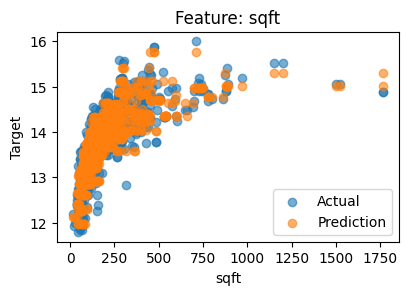



-------------------- Training Set Metrics --------------------

R2-Score on Training set ---> 0.9317
Residual Sum of Squares (RSS) on Training set  ---> 27.7696
Mean Squared Error (MSE) on Training set       ---> 0.038
Root Mean Squared Error (RMSE) on Training set ---> 0.195
Mean Absolute Error (MAE) on Training set      ---> 0.1473

-------------------- Testing Set Metrics --------------------

R2-Score on Testing set ---> 0.7851
Residual Sum of Squares (RSS) on Testing set  ---> 22.6575
Mean Squared Error (MSE) on Testing set       ---> 0.1238
Root Mean Squared Error (RMSE) on Testing set ---> 0.3519
Mean Absolute Error (MAE) on Testing set      ---> 0.2804


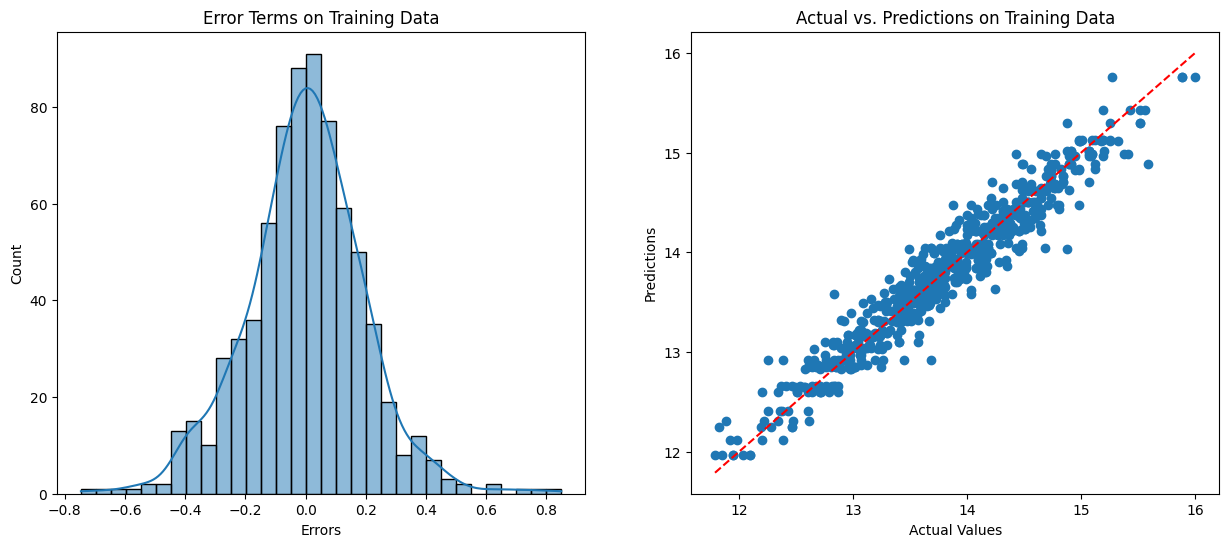

In [16]:

from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

pipeline_dt = Pipeline([
    ('scaler', StandardScaler()),  # Standardize the data
    ('dt', DecisionTreeRegressor())  # Decision tree model
])

# Define the hyperparameters grid for grid search
param_grid = {
    'dt__max_depth': [None, 10, 20],
    'dt__min_samples_split': [2, 5, 10],
    'dt__min_samples_leaf': [1, 2, 4],
    'dt__ccp_alpha': [0.0, 0.001, 0.01, 0.1]
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(pipeline_dt, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Get the best parameters and best estimator
best_params = grid_search.best_params_
best_estimator_dt = grid_search.best_estimator_

# Fit the best estimator on the training data
best_estimator_dt.fit(X_train, y_train)
DT = best_estimator_dt

# Predictions
pred_train = DT.predict(X_train)
pred_test = DT.predict(X_test)

print('\nEvaluating Decision Tree Regression Model\n')
Evaluate(0, X_train, y_train, X_test, y_test, pred_train, pred_test)

## Random Forest


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


Best parameters: {'rf__max_depth': 20, 'rf__max_features': 'auto', 'rf__min_samples_leaf': 2, 'rf__min_samples_split': 2, 'rf__n_estimators': 100}

Evaluating Random Forest Regression Model

Training MSE: 0.018341996356267678
Testing MSE: 0.07652800799501307


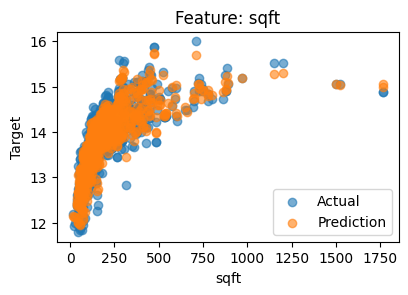



-------------------- Training Set Metrics --------------------

R2-Score on Training set ---> 0.9671
Residual Sum of Squares (RSS) on Training set  ---> 13.3897
Mean Squared Error (MSE) on Training set       ---> 0.0183
Root Mean Squared Error (RMSE) on Training set ---> 0.1354
Mean Absolute Error (MAE) on Training set      ---> 0.0994

-------------------- Testing Set Metrics --------------------

R2-Score on Testing set ---> 0.8672
Residual Sum of Squares (RSS) on Testing set  ---> 14.0046
Mean Squared Error (MSE) on Testing set       ---> 0.0765
Root Mean Squared Error (RMSE) on Testing set ---> 0.2766
Mean Absolute Error (MAE) on Testing set      ---> 0.2198


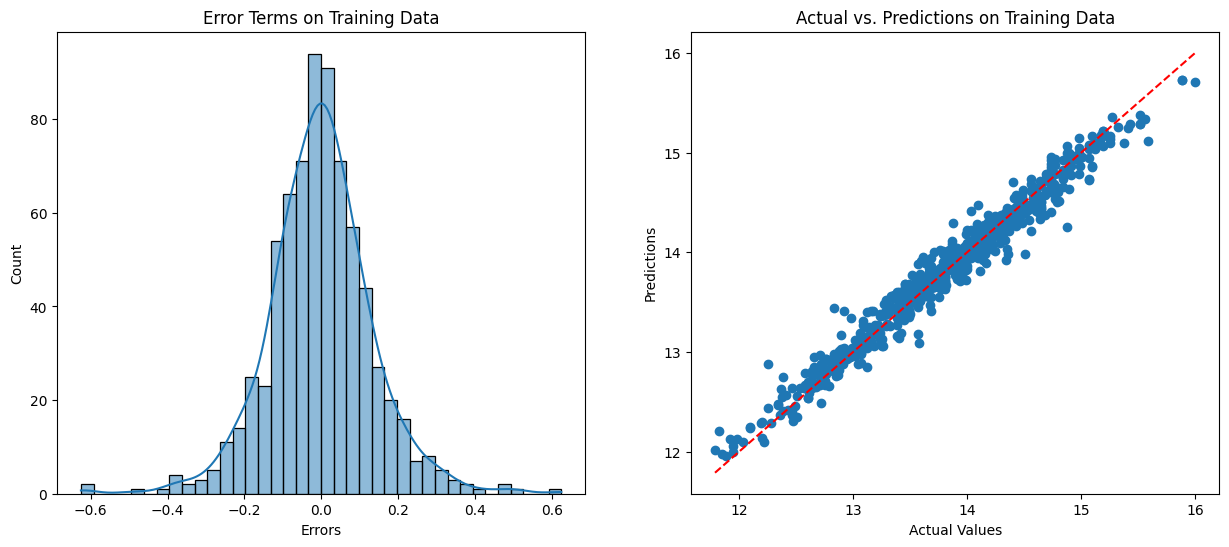

In [17]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt

pipeline_rf = Pipeline([
    ('scaler', StandardScaler()),  # Standardize the data
    ('rf', RandomForestRegressor(random_state=42))
])

# Define the hyperparameters grid for grid search
param_grid_rf = {
    'rf__n_estimators': [100, 200],
    'rf__max_depth': [10, 20, 30],
    'rf__min_samples_split': [2, 10, 20],
    'rf__min_samples_leaf': [1, 2, 4],  # Adding min_samples_leaf for further regularization
    'rf__max_features': ['auto', 'sqrt']  # Limiting the number of features per split
}

# Perform grid search with cross-validation
grid_search_rf = GridSearchCV(pipeline_rf, param_grid_rf, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search_rf.fit(X_train, y_train)

# Get the best parameters and best estimator
best_params_rf = grid_search_rf.best_params_
best_estimator_rf = grid_search_rf.best_estimator_

print("Best parameters:", best_params_rf)

# Predictions
pred_train = best_estimator_rf.predict(X_train)
pred_test = best_estimator_rf.predict(X_test)

# Evaluate the model
print('\nEvaluating Random Forest Regression Model\n')
print('Training MSE:', mean_squared_error(y_train, pred_train))
print('Testing MSE:', mean_squared_error(y_test, pred_test))
Evaluate(1, X_train, y_train, X_test, y_test, pred_train, pred_test)


## Gradient Boosting


Evaluating Gradient Boosting Regression Model



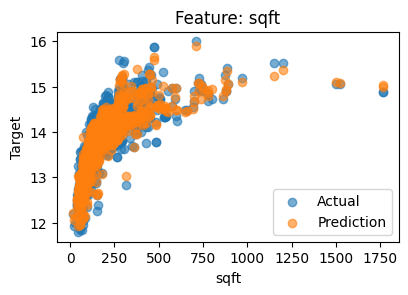



-------------------- Training Set Metrics --------------------

R2-Score on Training set ---> 0.9239
Residual Sum of Squares (RSS) on Training set  ---> 30.9222
Mean Squared Error (MSE) on Training set       ---> 0.0424
Root Mean Squared Error (RMSE) on Training set ---> 0.2058
Mean Absolute Error (MAE) on Training set      ---> 0.1588

-------------------- Testing Set Metrics --------------------

R2-Score on Testing set ---> 0.8679
Residual Sum of Squares (RSS) on Testing set  ---> 13.9253
Mean Squared Error (MSE) on Testing set       ---> 0.0761
Root Mean Squared Error (RMSE) on Testing set ---> 0.2759
Mean Absolute Error (MAE) on Testing set      ---> 0.2153


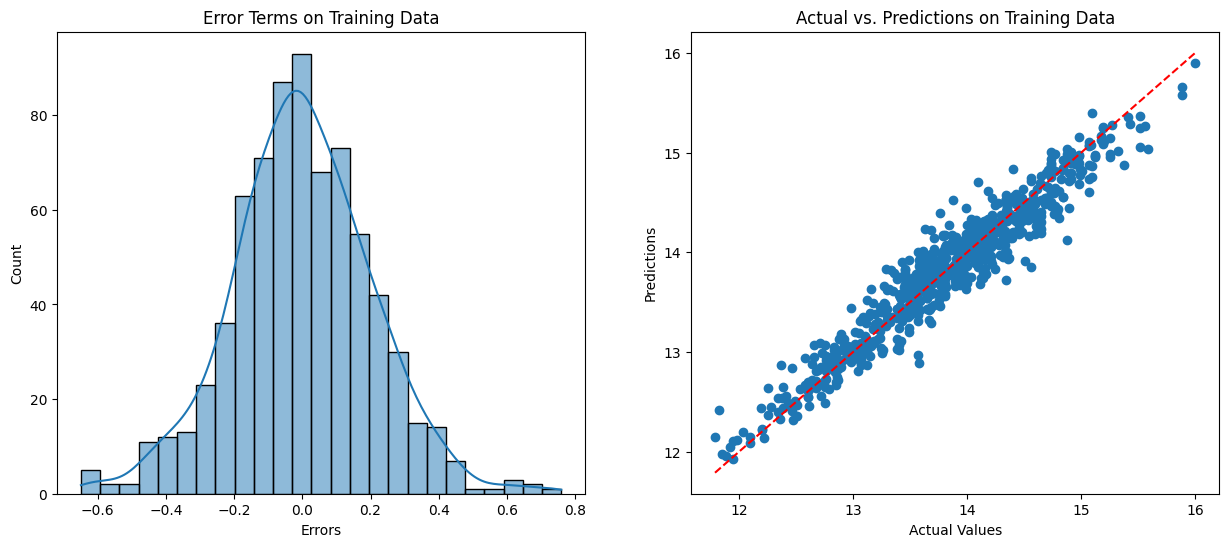

In [18]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

pipeline_gb = Pipeline([
    ('scaler', StandardScaler()),  # Standardize the data
    ('gb', GradientBoostingRegressor())  # Gradient Boost model
])

# Define the hyperparameters grid for grid search
param_grid_gb = {
    'gb__n_estimators': [100, 200, 300],  # Number of boosting stages
    'gb__max_depth': [3, 5, 7],  # Maximum depth of the individual regression estimators
    'gb__learning_rate': [0.1, 0.01, 0.001]  # Learning rate shrinks the contribution of each tree
}

# Perform grid search with cross-validation
grid_search_gb = GridSearchCV(pipeline_gb, param_grid_gb, cv=5, scoring='neg_mean_squared_error')
grid_search_gb.fit(X_train, y_train)

# Get the best parameters and best estimator
best_params_gb = grid_search_gb.best_params_
best_estimator_gb = grid_search_gb.best_estimator_

GB = best_estimator_gb

# Predictions
pred_train_gb = GB.predict(X_train)
pred_test_gb = GB.predict(X_test)

print('\nEvaluating Gradient Boosting Regression Model\n')
Evaluate(2, X_train, y_train, X_test, y_test, pred_train_gb, pred_test_gb)



## XGBoost


Evaluating XGBoost Regression Model



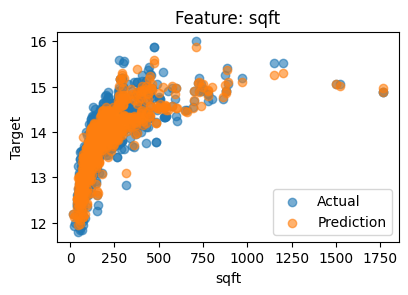



-------------------- Training Set Metrics --------------------

R2-Score on Training set ---> 0.9181
Residual Sum of Squares (RSS) on Training set  ---> 33.2837
Mean Squared Error (MSE) on Training set       ---> 0.0456
Root Mean Squared Error (RMSE) on Training set ---> 0.2135
Mean Absolute Error (MAE) on Training set      ---> 0.164

-------------------- Testing Set Metrics --------------------

R2-Score on Testing set ---> 0.8697
Residual Sum of Squares (RSS) on Testing set  ---> 13.7369
Mean Squared Error (MSE) on Testing set       ---> 0.0751
Root Mean Squared Error (RMSE) on Testing set ---> 0.274
Mean Absolute Error (MAE) on Testing set      ---> 0.218


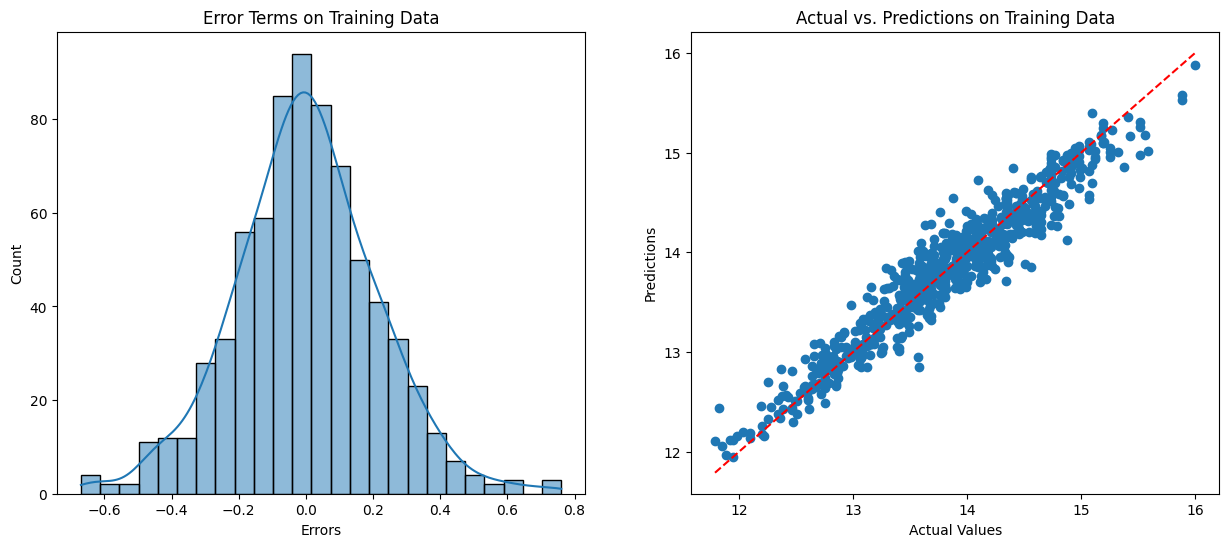

In [19]:
import xgboost as xgb
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

pipeline_xgb = Pipeline([
    ('scaler', StandardScaler()),  # Standardize the data
    ('xgb', xgb.XGBRegressor(objective='reg:squarederror'))  # XGBoost model
])

# Define the hyperparameters grid for grid search
param_grid_xgb = {
    'xgb__n_estimators': [100, 200, 300],  # Number of boosting rounds
    'xgb__max_depth': [3, 5, 7],  # Maximum depth of the tree
    'xgb__learning_rate': [0.1, 0.01, 0.001]  # Step size shrinkage used in updates
}

# Perform grid search with cross-validation
grid_search_xgb = GridSearchCV(pipeline_xgb, param_grid_xgb, cv=5, scoring='neg_mean_squared_error')
grid_search_xgb.fit(X_train, y_train)

# Get the best parameters and best estimator
best_params_xgb = grid_search_xgb.best_params_
best_estimator_xgb = grid_search_xgb.best_estimator_

XGB = best_estimator_xgb

# Predictions
pred_train_xgb = XGB.predict(X_train)
pred_test_xgb = XGB.predict(X_test)

print('\nEvaluating XGBoost Regression Model\n')
Evaluate(3, X_train, y_train, X_test, y_test, pred_train_xgb, pred_test_xgb)



## **Evaluating Our Models**

In [20]:
import pandas as pd

EMC = Model_Evaluation_Comparison_Matrix.copy()

EMC.index = [
    #'Multiple Linear Regression (MLR)',
    #Ridge Linear Regression (RLR)',
    #'Lasso Linear Regression (LLR)',
    #'Elastic-Net Regression (ENR)',
    #'Polynomial Regression (PNR)',
    'Decision Tree (DT)',
    'Random Forest (RF)',
    'Gradient Boosting (GB)',
    'XGBoost (XGB)'
]

EMC


,Train-R2,Test-R2,Train-RSS,Test-RSS,Train-MSE,Test-MSE,Train-RMSE,Test-RMSE,Train-MAE,Test-MAE
Decision Tree (DT),0.9317,0.7851,27.7696,22.6575,0.0380,0.1238,0.1950,0.3519,0.1473,0.2804
Random Forest (RF),0.9671,0.8672,13.3897,14.0046,0.0183,0.0765,0.1354,0.2766,0.0994,0.2198
Gradient Boosting (GB),0.9239,0.8679,30.9222,13.9253,0.0424,0.0761,0.2058,0.2759,0.1588,0.2153
XGBoost (XGB),0.9181,0.8697,33.2837,13.7369,0.0456,0.0751,0.2135,0.2740,0.1640,0.2180


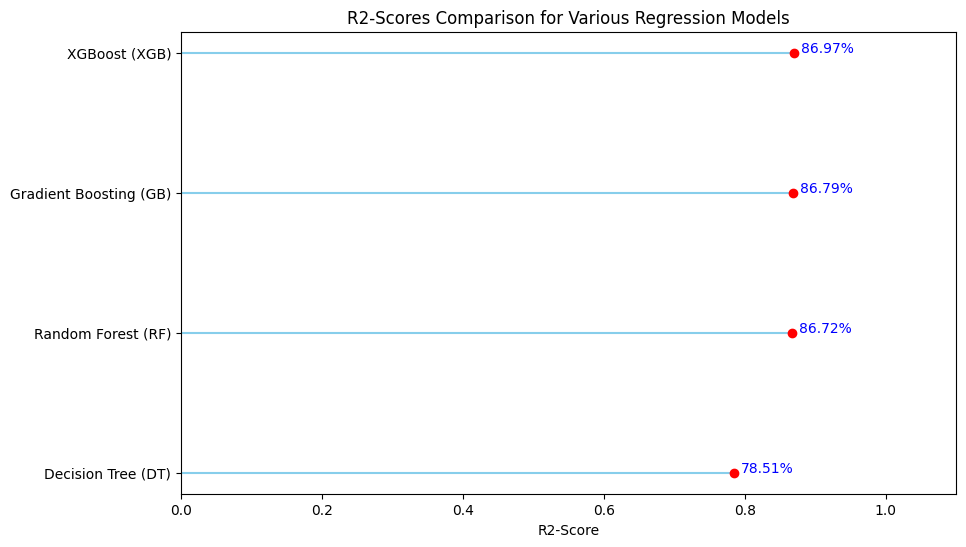

In [21]:
import matplotlib.pyplot as plt

R2 = EMC['Test-R2'].sort_values(ascending=True).round(4)


plt.figure(figsize=(10, 6))
plt.hlines(y=R2.index, xmin=0, xmax=R2.values, color='skyblue')
plt.plot(R2.values, R2.index, 'o', color='red')


plt.title('R2-Scores Comparison for Various Regression Models')
plt.xlabel('R2-Score')


for i, v in enumerate(R2):
    plt.text(v + 0.01, i, f"{v:.2%}", color='blue')


plt.xlim([0, 1.1])


plt.show()

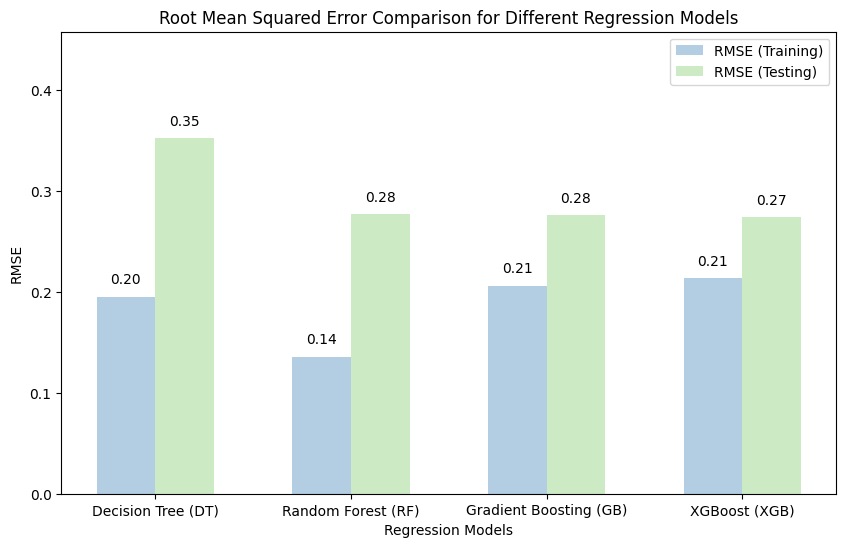

In [22]:

plt.figure(figsize=(10, 6))

colors_train = '#b3cde3'
colors_test = '#ccebc5'

pos = np.arange(len(EMC))

plt.bar(pos - 0.15, EMC['Train-RMSE'], width=0.3, label='RMSE (Training)', color=colors_train)

plt.bar(pos + 0.15, EMC['Test-RMSE'], width=0.3, label='RMSE (Testing)', color=colors_test)

plt.xticks(pos, EMC.index)

plt.xlabel('Regression Models')
plt.ylabel('RMSE')
plt.title('Root Mean Squared Error Comparison for Different Regression Models')
plt.legend()

plt.ylim(0, max(EMC['Train-RMSE'].max(), EMC['Test-RMSE'].max()) * 1.3)

for i in range(len(EMC)):
    plt.text(i - 0.15, EMC['Train-RMSE'].iloc[i] + 0.01, f'{EMC["Train-RMSE"].iloc[i]:.2f}', ha='center', va='bottom', color='black')
    plt.text(i + 0.15, EMC['Test-RMSE'].iloc[i] + 0.01, f'{EMC["Test-RMSE"].iloc[i]:.2f}', ha='center', va='bottom', color='black')

plt.show()



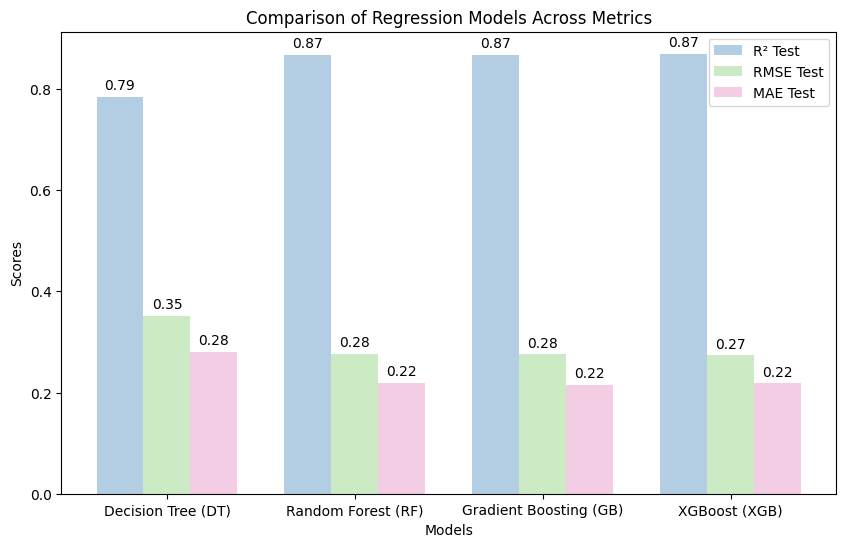

In [23]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots(figsize=(10, 6))

n_groups = len(EMC)
index = np.arange(n_groups)
bar_width = 0.25

rects1 = ax.bar(index, EMC['Test-R2'], bar_width, label='R² Test', color='#b3cde3')
rects2 = ax.bar(index + bar_width, EMC['Test-RMSE'], bar_width, label='RMSE Test', color='#ccebc5')
rects3 = ax.bar(index + 2*bar_width, EMC['Test-MAE'], bar_width, label='MAE Test', color='#f3cde3')

ax.set_xlabel('Models')
ax.set_ylabel('Scores')
ax.set_title('Comparison of Regression Models Across Metrics')
ax.set_xticks(index + bar_width)
ax.set_xticklabels(EMC.index)
ax.legend()

def add_labels(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

add_labels(rects1)
add_labels(rects2)
add_labels(rects3)

plt.show()


## **Predicting Housing Values**

In [24]:
example_index = X_test.index[25]
example_features = X_test.loc[[example_index]]
actual_price = y_test.loc[example_index]

print("Example House Features:")

print(example_features)
print(f"\nActual Price: ${actual_price:.2f}")

Example House Features:
    baths  rooms  sqft  Terrace  Garage  Pool  Garden  Exterior  \
67      1      2   102        0       1     0       0         0   

    RecentlyRenovated  HighFloor  ...  NorthFacing  WestFacing  NearSchool  \
67                  0          1  ...            0           0           0   

    NearAmenities  NearMetro  NearLandmark      PCA1      PCA2      PCA3  \
67              0          1             0 -1.232201 -2.256907 -1.177042   

        PCA4  
67 -0.027694  

[1 rows x 28 columns]

Actual Price: $13.57


In [25]:
predicted_price_rf = best_estimator_rf.predict(example_features)[0]
predicted_price_gb = best_estimator_gb.predict(example_features)[0]
predicted_price_xgb = best_estimator_xgb.predict(example_features)[0]
predicted_price_dt = best_estimator_dt.predict(example_features)[0]
predicted_price_lr = MLR.predict(example_features)[0]
predicted_price_lasso = LLR.predict(example_features)[0]
predicted_price_ridge = RLR.predict(example_features)[0]
predicted_price_poly = ridge_poly_model.predict(example_features)[0]
predicted_price_enr = ENR.predict(example_features)[0]

print(f"\nPredicted Price by Random Forest: ${predicted_price_rf:.2f}")
print(f"Predicted Price by Gradient Boosting: ${predicted_price_gb:.2f}")
print(f"Predicted Price by XGBoost: ${predicted_price_xgb:.2f}")
print(f"Predicted Price by Decision Tree: ${predicted_price_dt:.2f}")
print(f"Predicted Price by Linear Regression: ${predicted_price_lr:.2f}")
print(f"Predicted Price by Lasso Regression: ${predicted_price_lasso:.2f}")
print(f"Predicted Price by Ridge Regression: ${predicted_price_ridge:.2f}")
print(f"Predicted Price by Polynomial Regression: ${predicted_price_poly:.2f}")
print(f"Predicted Price by Elastic Net: ${predicted_price_enr:.2f}")



Predicted Price by Random Forest: $13.54
Predicted Price by Gradient Boosting: $13.57
Predicted Price by XGBoost: $13.54
Predicted Price by Decision Tree: $13.62
Predicted Price by Linear Regression: $13.61
Predicted Price by Lasso Regression: $13.52
Predicted Price by Ridge Regression: $13.61
Predicted Price by Polynomial Regression: $13.45
Predicted Price by Elastic Net: $13.52


## **Feature Importance**

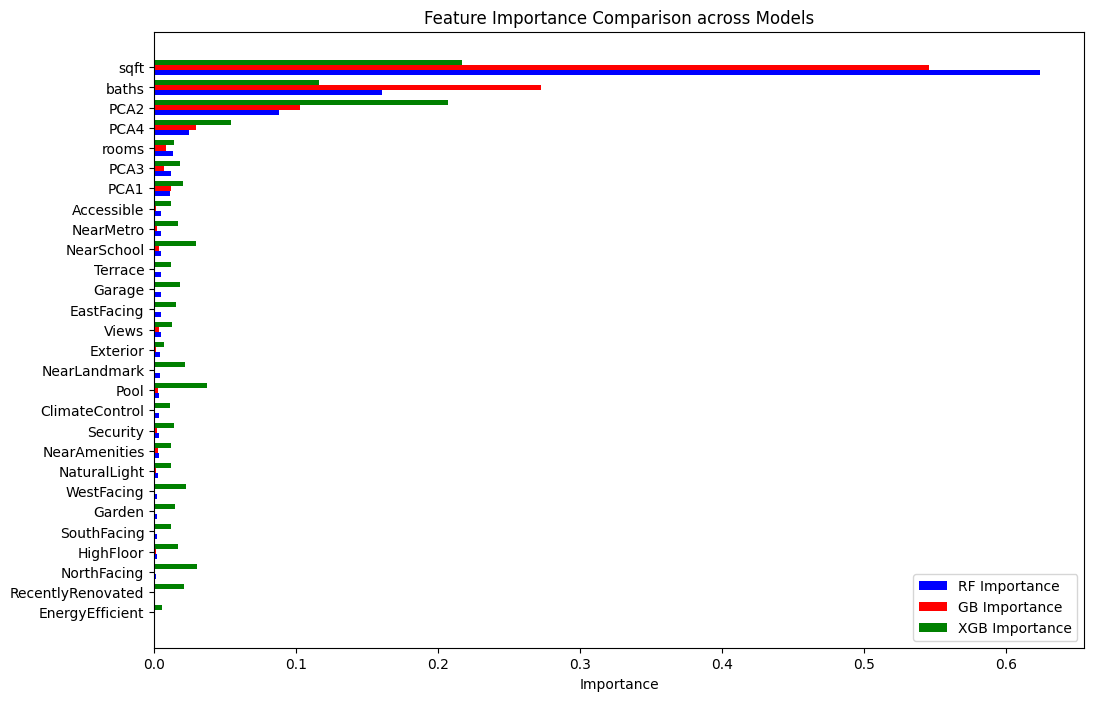

In [26]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

pipeline_xgb.fit(X_train, y_train)
pipeline_gb.fit(X_train, y_train)
pipeline_rf.fit(X_train, y_train)

xgb_importance = pipeline_xgb.named_steps['xgb'].feature_importances_
gb_importance = pipeline_gb.named_steps['gb'].feature_importances_
rf_importance = pipeline_rf.named_steps['rf'].feature_importances_


feature_names = X_train.columns.tolist()

feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'XGB Importance': xgb_importance,
    'GB Importance': gb_importance,
    'RF Importance': rf_importance
})

feature_importance_df = feature_importance_df.sort_values(by='RF Importance', ascending=True)

# Plotting
fig, ax = plt.subplots(figsize=(12, 8))
index = np.arange(len(feature_importance_df['Feature']))
bar_width = 0.25

rects1 = ax.barh(index - bar_width, feature_importance_df['RF Importance'], bar_width, label='RF Importance', color='b')
rects2 = ax.barh(index, feature_importance_df['GB Importance'], bar_width, label='GB Importance', color='r')
rects3 = ax.barh(index + bar_width, feature_importance_df['XGB Importance'], bar_width, label='XGB Importance', color='g')

ax.set_xlabel('Importance')
ax.set_title('Feature Importance Comparison across Models')
ax.set_yticks(index)
ax.set_yticklabels(feature_importance_df['Feature'])
ax.legend()

plt.show()


In [27]:
min(y_test)

11.711784520403112

In [28]:
max(y_test)

15.59046307836746